In [1]:
import numpy as np, pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
xls = pd.ExcelFile("KPMG Final.xlsx")
df1 = pd.read_excel(xls, 'Transactions', header =1)
df2=  pd.read_excel(xls, 'CustomerDemographic', header =1)
df3 = pd.read_excel(xls, 'CustomerAddress', header =1)

## Data Exploration

### Customer Demographic

In [3]:
df3.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,NSW,Australia,10
1,2,6 Meadow Vale Court,2153,NSW,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,NSW,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


The dataset has 3999 rows and 6 columns

In [4]:
df3.shape

(3999, 6)

Text(0.5, 1.0, 'Distribution of customer locations')

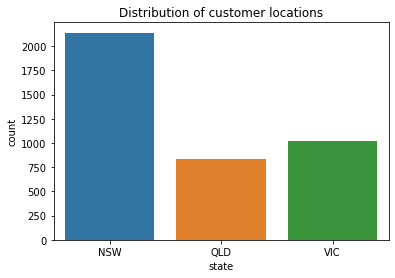

In [5]:
# See the distribution of state to recognize different distributions
sns.countplot(x='state', data=df3);
plt.title('Distribution of customer locations')

Majority of the customers live in New South Wales, Australia

### Customer Background

In [6]:
df2.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,Age,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,Female,93,1953-10-12,67.0,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,39.0,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,66.0,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,59.0,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,43.0,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [7]:
df2.shape

(4000, 14)

*Let's see customer age and gender distribution*

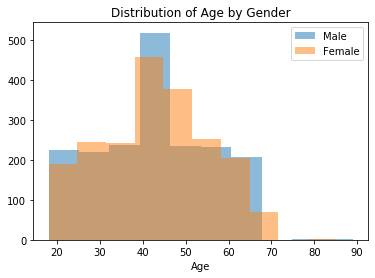

In [8]:
plt.hist('Age', data=df2[df2['gender'] == 'Male'], alpha=0.5, label='Male');
plt.hist('Age', data=df2[df2['gender'] == 'Female'], alpha=0.5, label='Female');
plt.title('Distribution of Age by Gender');
plt.xlabel('Age');
plt.legend();

The men in this data set tended to be younger than the women. You can see the spike around the age of 40–50 for the women is where the majority of them fall. There are also more middle-aged women in this data set than men. There is an amount of senior women in the 65–70 year old bucket.

Let's categorize age group to check the distribution of number of customers in each age group

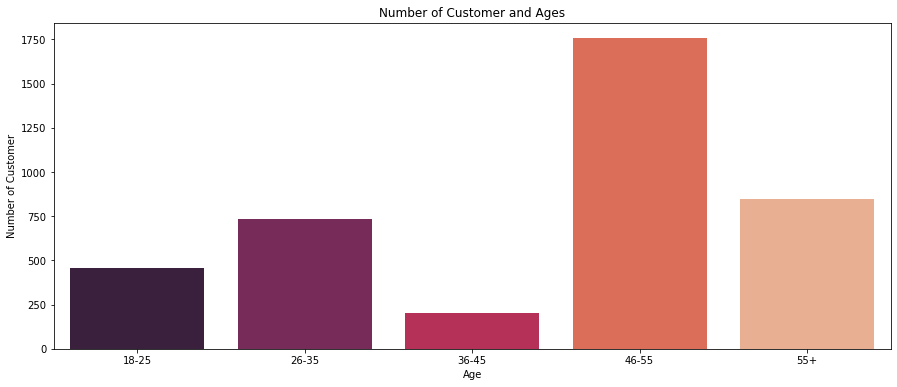

In [9]:
age18_25 = df2.Age[(df2.Age <= 25) & (df2.Age >= 18)]
age26_35 = df2.Age[(df2.Age <= 35) & (df2.Age >= 26)]
age36_45 = df2.Age[(df2.Age < 40) & (df2.Age >= 36)]
age46_55 = df2.Age[(df2.Age <= 55) & (df2.Age >= 40)]
age55above = df2.Age[df2.Age >= 56]

x = ["18-25","26-35","36-45","46-55","55+"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age55above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Number of Customer and Ages")
plt.xlabel("Age")
plt.ylabel("Number of Customer")
plt.show()

Clearly the 36–45 age group outweighs every other age group.

*Let's see the income distribution*

Top 3 industries: Manufacturing, Financial Services and Health. Most customers are in mass customers segment. 

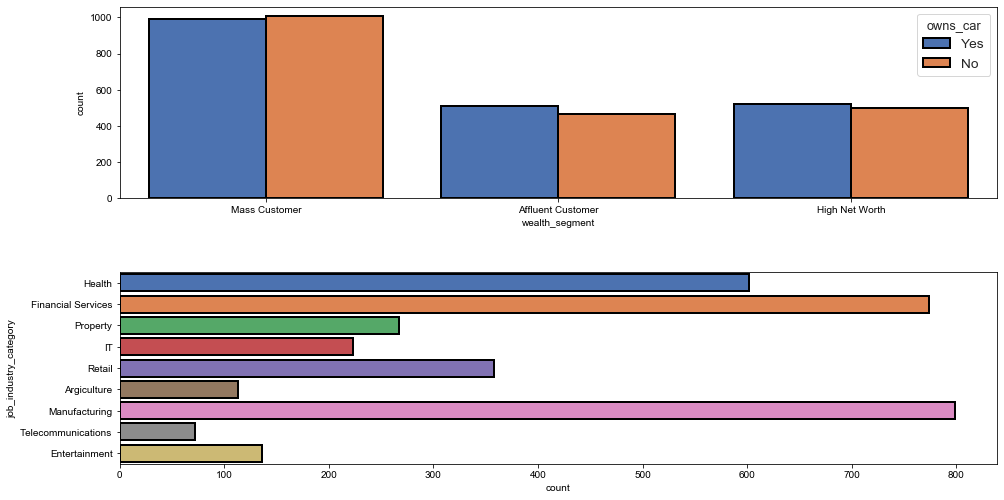

In [10]:
fig, ax = plt.subplots(2,figsize = (15,8))
sns.set(style="white",font_scale=1.25)
sns.countplot(data=df2,
                  x = 'wealth_segment',
                  hue = 'owns_car',
                  saturation=1, edgecolor=(0,0,0),
                  linewidth=2,
                  ax=ax[0])

sns.countplot(data=df2,
                  y = 'job_industry_category', edgecolor=(0,0,0),
                  linewidth=2,
                  saturation=1,
                  ax=ax[1])
fig. tight_layout(pad=3.0)

### Transactions

In [11]:
df1.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,1274.93,764.96,2016-07-09
1,517,77,311,2017-01-01,1.0,Approved,WeareA2B,Standard,medium,medium,1769.64,108.76,2011-05-09
2,561,65,2298,2017-01-01,0.0,Approved,WeareA2B,Standard,medium,medium,1807.45,778.69,2010-08-20
3,1293,67,1931,2017-01-01,1.0,Approved,Norco Bicycles,Road,medium,medium,544.05,376.84,2005-10-22
4,1403,0,2891,2017-01-01,1.0,Approved,OHM Cycles,Standard,medium,medium,183.86,137.90,1993-07-20


There are 20,000 transactions over the period (Jan 2017 - Dec 2017)

In [12]:
df1.shape

(20000, 13)

In [13]:
df1['list_price'].sum()

22156588.98

*How was the sales pattern during the period?*

(736330.0, 736693.0)

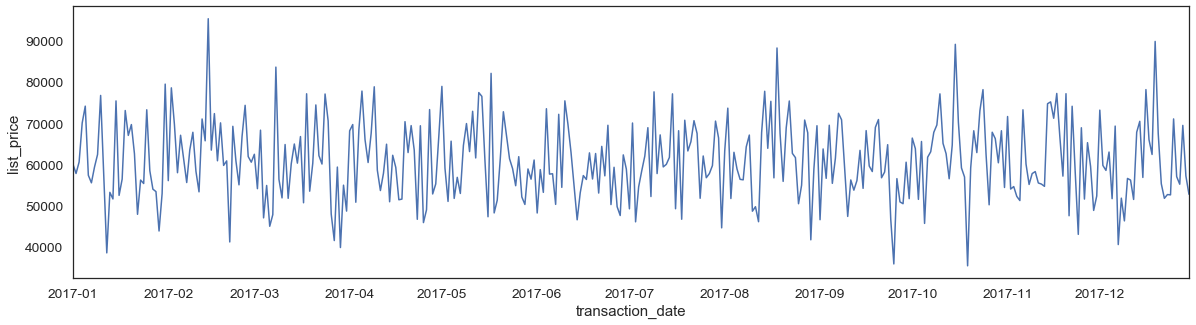

In [14]:
df1['transaction_date'] = pd.to_datetime(df1['transaction_date'])
y = df1.groupby(['transaction_date'])['list_price'].sum().reset_index()
plt.figure(figsize = (20,5))
ax = sns.lineplot(data=y, x='transaction_date', y = 'list_price')
ax.set_xlim(y['transaction_date'].min(), y['transaction_date'].max())


The bike sales was quite steady over the year without peak season. The sales rose in February, June, October and December.<br>
Average daily list price was in range between 50,000 and 70,000.

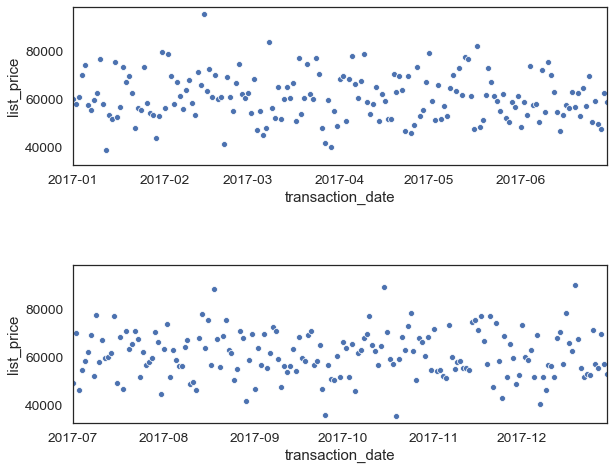

In [15]:
fig, ax = plt.subplots(2,figsize = (10,8))
sns.scatterplot(data=y, x='transaction_date', y = 'list_price', ax = ax[0]).set_xlim([dt.date(2017, 1, 1), dt.date(2017, 6, 30)])
sns.scatterplot(data=y, x='transaction_date', y = 'list_price', ax = ax[1]).set_xlim([dt.date(2017, 7, 1), dt.date(2017, 12, 30)])
fig.tight_layout(pad=4.0)

*Top sales product brands and product lines*

- Best selling brand: Solex

- In all brands, Standard is the most popular Product line.


Text(0.5, 1.0, 'Top selling brands')

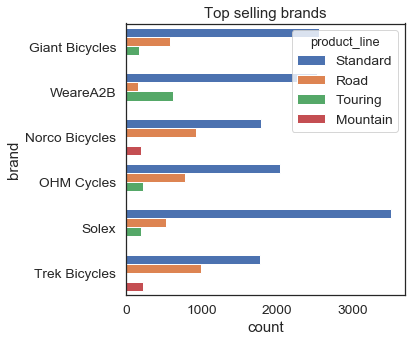

In [16]:
plt.figure(figsize = (5,5))
sns.countplot(y='brand', hue = 'product_line', data=df1, saturation = 1);
plt.title('Top selling brands')

The 3 data sets were combined to a final data for model development. 
 - Total spend: USD22,156,588
 - Total customers: 3,489

In [17]:
online = pd.merge(df1, df2, on ='customer_id', how='inner')
online = pd.merge(online, df3, on ='customer_id', how='inner')
online.shape

(19968, 31)

In [18]:
online['customer_id'].nunique()

3489

In [19]:
online['list_price'].sum()

22120151.12

## Model Development

### Cohort Analysis

#### What is Cohort Analysis?
A cohort is simply a subset of users grouped by shared characteristics. Cohort Analysis is a descriptive analytics tool which can be defined as a dissection of the activities of a group of people (i.e customers) who share a common characteristic over time. Cohort Analysis provides deeper insights than the so-called vanity-metrics. It helps with understanding the high level trends better by providing insights on metrics across both **product** and **customer** lifecircle.
<br>
#### Type of Cohort
- **Time cohorts** <br>
Grouping customers sign up for product/service in during a particular timeframe (quarterly, monthly or daily)
- **Behavior cohorts** <br>
Grouping customers by the type of product/services they signed up in the past. Understanding the needs of different cohorts helps company design personalized services/products for prticular segments.
- **Size cohorts** <br>
Grouping customers by the size of customers(i.e amount of spending, or product type that customers spend most of their order amount in some period of time.

In [20]:
# Define a function that will parse the date
def get_month(x): return dt.datetime(x.year, x.month, 1) 

# Create InvoiceDay column
online['InvoiceMonth'] = online['transaction_date'].apply(get_month) 

# Group by CustomerID and select the InvoiceDay value
grouping = online.groupby('customer_id')['InvoiceMonth'] 

# Assign a minimum InvoiceDay value to the dataset
online['CohortMonth'] = grouping.transform('min')

# View the top 5 rows
online.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,default,owns_car,tenure,address,postcode,state,country,property_valuation,InvoiceMonth,CohortMonth
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,...,NaN,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-01-01,2017-01-01
1,13503,77,462,2017-02-09,1.0,Approved,Norco Bicycles,Road,medium,large,...,NaN,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-02-01,2017-01-01
2,15796,64,462,2017-02-09,1.0,Approved,Trek Bicycles,Standard,medium,large,...,NaN,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-02-01,2017-01-01
3,14860,85,462,2017-07-03,1.0,Approved,WeareA2B,Standard,medium,medium,...,NaN,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-07-01,2017-01-01
4,19435,94,462,2017-07-23,1.0,Approved,Giant Bicycles,Standard,medium,large,...,NaN,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-07-01,2017-01-01


In [21]:
#Define function to extract year, month and day integer values.
def get_date_int(df, column):
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [22]:
#Assign offset value
invoice_year, invoice_month, _ = get_date_int(online, 'InvoiceMonth')
cohort_year, cohort_month, _ = get_date_int(online, 'CohortMonth')
years_diff = invoice_year - cohort_year
months_diff = invoice_month - cohort_month
online['CohortIndex'] = years_diff * 12 + months_diff + 1 #adding 1 so that 1st month as 1 instead of 0 for easier interpretation
online.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,...,owns_car,tenure,address,postcode,state,country,property_valuation,InvoiceMonth,CohortMonth,CohortIndex
0,140,11,462,2017-01-01,0.0,Approved,Giant Bicycles,Standard,high,medium,...,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-01-01,2017-01-01,1
1,13503,77,462,2017-02-09,1.0,Approved,Norco Bicycles,Road,medium,large,...,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-02-01,2017-01-01,2
2,15796,64,462,2017-02-09,1.0,Approved,Trek Bicycles,Standard,medium,large,...,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-02-01,2017-01-01,2
3,14860,85,462,2017-07-03,1.0,Approved,WeareA2B,Standard,medium,medium,...,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-07-01,2017-01-01,7
4,19435,94,462,2017-07-23,1.0,Approved,Giant Bicycles,Standard,medium,large,...,Yes,5.0,23 Glacier Hill Avenue,2259,NSW,Australia,6,2017-07-01,2017-01-01,7


##### Monthly active customers from each cohort

In [23]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['customer_id'].apply(pd.Series.nunique)
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth', columns='CohortIndex', values='customer_id')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1352.0,486.0,507.0,509.0,501.0,483.0,517.0,529.0,499.0,530.0,497.0,516.0
2017-02-01,799.0,324.0,297.0,313.0,287.0,298.0,308.0,280.0,329.0,308.0,296.0,NaN
2017-03-01,483.0,166.0,173.0,167.0,182.0,183.0,172.0,211.0,189.0,180.0,NaN,NaN
2017-04-01,336.0,111.0,121.0,153.0,143.0,121.0,142.0,126.0,132.0,NaN,NaN,NaN
2017-05-01,210.0,85.0,81.0,87.0,71.0,74.0,73.0,81.0,NaN,NaN,NaN,NaN
2017-06-01,121.0,44.0,43.0,47.0,46.0,45.0,53.0,NaN,NaN,NaN,NaN,NaN
2017-07-01,77.0,26.0,29.0,32.0,37.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,51.0,19.0,21.0,17.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,23.0,7.0,7.0,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


As we can see on the table, the first column with cohort index '1' represents the total number of customers in that cohort, this is the month of their first transaction. For example, First cohort was acquired in January 2017 and there are 1352 customers. Last cohort was acquired in December 2017 and there are 4 customers in this cohort

##### Customer retention rate

In [24]:
#Store the first column as cohort_sizes
cohort_sizes = cohort_counts.iloc[:,0]
#Divide all values in the cohort_counts table by cohort_sizes
retention = cohort_counts.divide(cohort_sizes, axis=0)
#Review the retention table
retention.round(3) * 100

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,100.0,35.9,37.5,37.6,37.1,35.7,38.2,39.1,36.9,39.2,36.8,38.2
2017-02-01,100.0,40.6,37.2,39.2,35.9,37.3,38.5,35.0,41.2,38.5,37.0,NaN
2017-03-01,100.0,34.4,35.8,34.6,37.7,37.9,35.6,43.7,39.1,37.3,NaN,NaN
2017-04-01,100.0,33.0,36.0,45.5,42.6,36.0,42.3,37.5,39.3,NaN,NaN,NaN
2017-05-01,100.0,40.5,38.6,41.4,33.8,35.2,34.8,38.6,NaN,NaN,NaN,NaN
2017-06-01,100.0,36.4,35.5,38.8,38.0,37.2,43.8,NaN,NaN,NaN,NaN,NaN
2017-07-01,100.0,33.8,37.7,41.6,48.1,31.2,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,100.0,37.3,41.2,33.3,25.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,100.0,30.4,30.4,39.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The first column has 100% retention rate for all cohorts as expected. Based on this table, we can compare the retention rate over the time and across cohorts to evaluate health of our customers' shopping habits

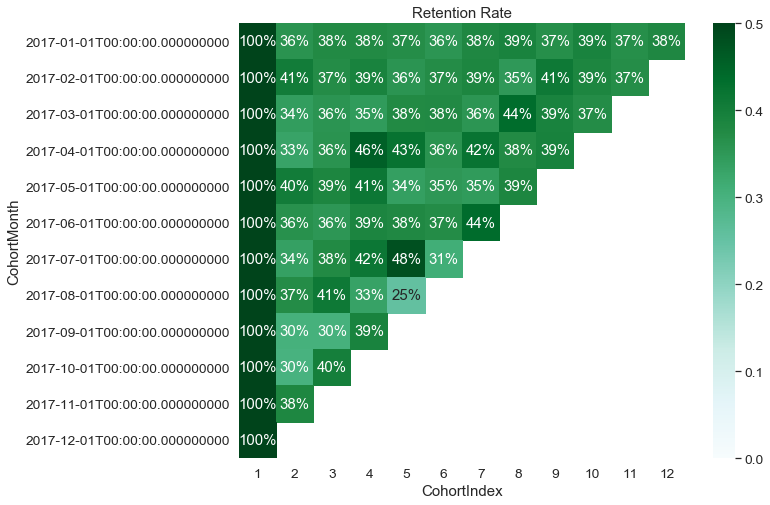

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (10,8))
plt.title('Retention Rate')
sns.heatmap(data = retention,
           annot = True,
           fmt = '.0%',
           vmin= 0.0,
           vmax = 0.5,
           cmap = 'BuGn')
plt.show()

Heamap is useful to illustrate the retention rate. Column 1 is the month of first purchase, therefore the retention rate is 100%. For example, 33% of cohort which signed up in August 2017 were active 4 months later

##### Average price metric in shopping patterns across time and across cohorts.

In [26]:
grouping = online.groupby(['CohortMonth','CohortIndex'])
cohort_data = grouping['list_price'].mean()
cohort_data = cohort_data.reset_index()
average_price = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='list_price')
average_price.round(1)

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12
CohortMonth,,,,,,,,,,,,
2017-01-01,1109.9,1141.0,1118.8,1120.3,1116.3,1125.3,1143.0,1066.8,1106.4,1102.9,1086.5,1055.9
2017-02-01,1087.9,1103.1,1113.0,1127.8,1128.9,1090.6,1150.1,1062.1,1090.6,1115.3,1098.2,NaN
2017-03-01,1072.6,1165.7,1156.7,1066.3,1046.2,1160.5,1136.9,1134.3,1123.4,1095.2,NaN,NaN
2017-04-01,1073.5,1159.5,1102.4,1081.9,1037.2,1099.2,1110.0,1085.2,1235.6,NaN,NaN,NaN
2017-05-01,1144.9,1079.4,1109.5,1144.3,1166.3,1138.8,1070.3,1220.9,NaN,NaN,NaN,NaN
2017-06-01,1106.4,1144.7,1225.1,1203.6,1070.0,1062.2,1108.9,NaN,NaN,NaN,NaN,NaN
2017-07-01,1000.4,1131.7,1167.4,1108.7,1111.2,1162.8,NaN,NaN,NaN,NaN,NaN,NaN
2017-08-01,1090.8,944.8,1358.1,1052.1,1168.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2017-09-01,1318.2,919.8,716.0,929.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


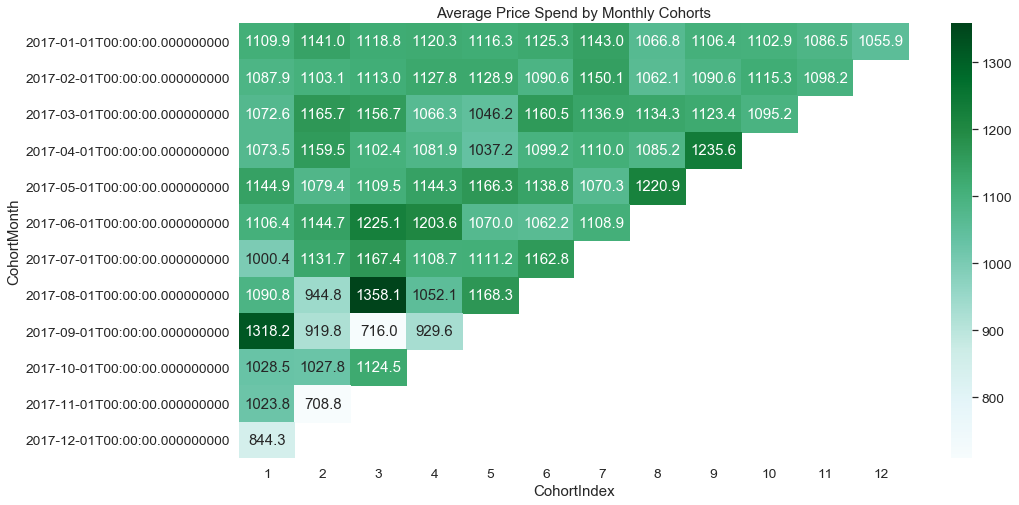

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (15,8))
plt.title('Average Price Spend by Monthly Cohorts')
sns.heatmap(data = average_price,
           annot = True,
            fmt= '.1f',
           cmap = 'BuGn')
plt.show()

### RFM Analysis

#### What is RFM segmentation?
Behavioral customer segmentation based on three metrics:
 - Recency (R)
 How recent each customer's last purchase
 - Frequency (F)
 How many purchases each customer has done in the period
 - Monetary Value (M)
 How much the customer has spent during the period

#### Grouping RFM values
The RFM values can be grouped in several ways:
 - Percentiles e.g. quantiles
 - Pareto 80/20 cut
 - Custom - based on business knowledge
In this project, I am going to implement percentile-based grouping.
<br> <br>
Process of calculating percentiles:
1. Sort customers based on that metric
2. Break customers into a pre-defined number of groups of equal size
3. Assign a label to each group

##### Recency
To calculate recency, we need to find out most recent purchase date of each customer and see how many days they are inactive for

In [28]:
user = pd.DataFrame(online['customer_id'].unique())
user.columns = ['customer_id']
#get the max purchase date for each customer and create a dataframe with it
user_purchase = online.groupby('customer_id').transaction_date.max().reset_index()
user_purchase.columns = ['customer_id','MaxPurchaseDate']
user_purchase.head()

,customer_id,MaxPurchaseDate
0,1,2017-12-23
1,2,2017-08-24
2,4,2017-06-18
3,5,2017-12-14
4,6,2017-10-27


In [29]:
#we take our observation point as the max invoice date in our dataset
user_purchase['Recency'] = (user_purchase['MaxPurchaseDate'].max() - user_purchase['MaxPurchaseDate']).dt.days

#merge this dataframe to our new user dataframe
user = pd.merge(user, user_purchase[['customer_id','Recency']], on='customer_id')
user.head()

,customer_id,Recency
0,462,142
1,311,61
2,2298,45
3,1931,23
4,2891,62


#### Frequency
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [30]:
#calculate frequency of purchases
frequency_df = online.groupby('customer_id')['transaction_id'].count().reset_index()
frequency_df.columns = ['customer_id','Frequency']
#add this data to our main dataframe
user = pd.merge(user, frequency_df, on='customer_id')
user.head()

,customer_id,Recency,Frequency
0,462,142,6
1,311,61,6
2,2298,45,6
3,1931,23,3
4,2891,62,7


#### Monetary
Monetary attribute answers the question: How much money did the customer spent over time?

In [31]:
monetary_df = online.groupby('customer_id')['list_price'].sum().reset_index()
monetary_df.columns = ['customer_id','Monetary']

#merge it with our main dataframe
user = pd.merge(user, monetary_df, on='customer_id')
user.head()

,customer_id,Recency,Frequency,Monetary
0,462,142,6,7830.79
1,311,61,6,7559.06
2,2298,45,6,6997.85
3,1931,23,3,2218.50
4,2891,62,7,8583.39


#### Applying RFM score formula
Other way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary individually. 1 is the best/highest value, and 4 is the lowest/worst value

In [32]:
# Create numbered labels
r_labels = range(1,5)
f_labels = list(range(4, 0, -1))
m_labels = list(range(4, 0, -1))
# Divide into groups based on quartiles
r_quartiles = pd.qcut(user['Recency'], q=4, labels=r_labels)
f_quartiles = pd.qcut(user['Frequency'], 4, labels = f_labels)
m_quartiles = pd.qcut(user['Monetary'], 4, labels = m_labels)
# Create new column
user = user.assign(R = r_quartiles.values)
user = user.assign(F = f_quartiles.values)
user = user.assign(M = m_quartiles.values)
user

,customer_id,Recency,Frequency,Monetary,R,F,M
0,462,142,6,7830.79,4,3,2
1,311,61,6,7559.06,3,3,2
2,2298,45,6,6997.85,3,3,2
3,1931,23,3,2218.50,2,4,4
4,2891,62,7,8583.39,3,2,1
...,...,...,...,...,...,...,...
3484,2749,34,1,1061.56,2,4,4
3485,3446,4,2,1028.53,1,4,4
3486,2417,22,1,1129.13,2,4,4
3487,1485,4,2,1871.67,1,4,4


#### Build RFM Segment and RFM Score

In [33]:
def join_rfm(x): return str(x['R']) + str(x['F']) + str(x['M'])
user['RFM_Segment'] = user.apply(join_rfm, axis=1)
user['RFM_Score'] = user[['R','F','M']].sum(axis=1)
user

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score
0,462,142,6,7830.79,4,3,2,432,9.0
1,311,61,6,7559.06,3,3,2,332,8.0
2,2298,45,6,6997.85,3,3,2,332,8.0
3,1931,23,3,2218.50,2,4,4,244,10.0
4,2891,62,7,8583.39,3,2,1,321,6.0
...,...,...,...,...,...,...,...,...,...
3484,2749,34,1,1061.56,2,4,4,244,10.0
3485,3446,4,2,1028.53,1,4,4,144,9.0
3486,2417,22,1,1129.13,2,4,4,244,10.0
3487,1485,4,2,1871.67,1,4,4,144,9.0


In [34]:
user.groupby('RFM_Segment').size().sort_values(ascending=False)[:10]

RFM_Segment
444    337
111    216
211    200
344    169
311    133
244    127
333    127
233    126
132    125
432    125
dtype: int64

In [35]:
user.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'Monetary': ['mean', 'count'] }).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0           7.7       9.4  10991.1   216
4.0          23.2       8.8  10296.0   291
5.0          38.1       8.0   8990.2   312
6.0          38.0       6.8   7865.1   377
7.0          38.8       6.0   6612.9   386
8.0          50.0       5.4   5935.6   433
9.0          61.2       4.6   4968.7   484
10.0         75.2       4.1   4206.7   353
11.0         98.9       3.5   3695.9   300
12.0        163.3       2.6   2547.6   337

First, let's try to use RFM score to group customers into **Gold**, **Silver** and **Bronze** segments

In [36]:
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Bronze'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Gold'
    
user['General_Segment'] = user.apply(segment_me, axis=1)
user.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'Monetary': ['mean', 'count']
}).round(1)

Recency Frequency Monetary      
                   mean      mean     mean count
General_Segment                                 
Bronze             95.6       3.8   3973.6  1474
Gold               16.6       9.1  10592.1   507
Silver             41.7       6.5   7223.3  1508

However, in this project I'll divide customers into 6 segments below and see the number of customers each segment.
![](capture.png)

In [37]:
def segment(df):
    if df['RFM_Segment'] == '111': 
        return 'Best Customers'
    elif df['RFM_Segment']== '311':
        return 'Almost Lost'
    elif df['RFM_Segment']== '411':
        return 'Lost Customers'
    elif df['RFM_Segment']== '444':
        return 'Lost Cheap Customers'
    elif df['F']==1:
        return 'Loyal Customers'
    elif df['M']==1:
        return 'Big Spenders'
    else:
        return 'Others'
    
user['Segment'] = user.apply(segment, axis=1)

In [38]:
user.head()

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment,Segment
0,462,142,6,7830.79,4,3,2,432,9.0,Bronze,Others
1,311,61,6,7559.06,3,3,2,332,8.0,Silver,Others
2,2298,45,6,6997.85,3,3,2,332,8.0,Silver,Others
3,1931,23,3,2218.50,2,4,4,244,10.0,Bronze,Others
4,2891,62,7,8583.39,3,2,1,321,6.0,Silver,Big Spenders


In [39]:
print("Best Customers: ",len(user[user['RFM_Segment']=='111']))
print('Loyal Customers: ',len(user[user['F']==1]))
print("Big Spenders: ",len(user[user['M']==1]))
print('Almost Lost: ', len(user[user['RFM_Segment']=='311']))
print('Lost Customers: ',len(user[user['RFM_Segment']=='411']))
print('Lost Cheap Customers: ',len(user[user['RFM_Segment']=='444']))

Best Customers:  216
Loyal Customers:  735
Big Spenders:  872
Almost Lost:  133
Lost Customers:  39
Lost Cheap Customers:  337


#### Who are the top 10 of our best customers?

In [40]:
user[user['RFM_Segment']=='111'].sort_values('Monetary', ascending=False).head(10)

,customer_id,Recency,Frequency,Monetary,R,F,M,RFM_Segment,RFM_Score,General_Segment,Segment
2302,2183,8,14,19071.32,1,1,1,111,3.0,Gold,Best Customers
973,1140,6,13,16199.24,1,1,1,111,3.0,Gold,Best Customers
2407,729,1,10,15826.00,1,1,1,111,3.0,Gold,Best Customers
2875,1317,10,9,15370.81,1,1,1,111,3.0,Gold,Best Customers
1680,2762,16,10,15071.26,1,1,1,111,3.0,Gold,Best Customers
211,1329,4,11,14818.12,1,1,1,111,3.0,Gold,Best Customers
426,322,1,12,14782.23,1,1,1,111,3.0,Gold,Best Customers
1486,3048,4,13,14756.09,1,1,1,111,3.0,Gold,Best Customers
386,2860,8,10,14673.35,1,1,1,111,3.0,Gold,Best Customers
1631,1460,12,8,14633.24,1,1,1,111,3.0,Gold,Best Customers


## K means clustering

K means clustering is one of the most popular unsupervised learning method. It's simple and fast with large data set.


#### Key steps
 - Data pre-processing
 - Choosing a number of clusters
 - Running k-means clustering on pre-processed data
 - Analyzing average RFM values of each cluster

#### Data Pre-processing

##### Recency distribution

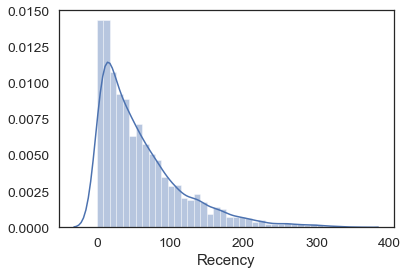

In [41]:
sns.distplot(user['Recency'])
plt.show()

The Recency metric has tail on the right, so we can conclude that it is skewed

##### Frequency distribution

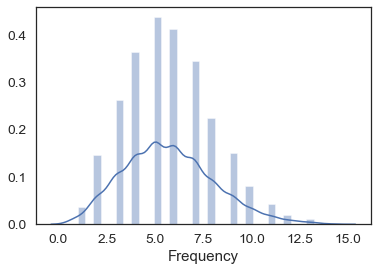

In [42]:
sns.distplot(user['Frequency'])
plt.show()

##### Monetary distribution

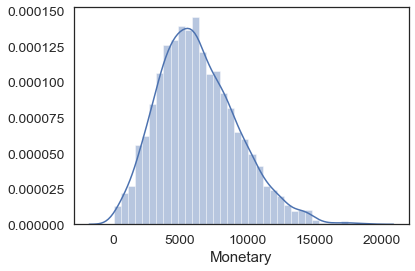

In [43]:
sns.distplot(user['Monetary'])
plt.show()

Let's unskew the data by applying a logarithmic transformation

In [44]:
user_rfm = user[['Recency', 'Frequency', 'Monetary']]

In [45]:
user_rfm['Recency'] = user_rfm['Recency'] + 1
import numpy as np
user_rfm = np.log(user_rfm)
user_rfm = pd.DataFrame(data = user_rfm, index = user_rfm.index, columns = user_rfm.columns)
user_rfm.describe()

C:\Users\user\Anaconda3\anaconda\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Recency,Frequency,Monetary
count,3489.000000,3489.000000,3489.000000
mean,3.608955,1.649254,8.620041
std,1.164439,0.464499,0.579690
min,0.000000,0.000000,4.099995
25%,2.890372,1.386294,8.342204
50%,3.806662,1.791759,8.703146
75%,4.454347,1.945910,9.012291
max,5.869297,2.639057,9.855941


By comparing the mean and standard deviation of each variable, we can see that Recency, Frequency and Monetary has different average value and standard deviation value. As K-means works well on variables with the same mean and variance, let's center variables and scale variables.

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(user_rfm)
user_normalized = scaler.transform(user_rfm)
user_normalized = pd.DataFrame(user_normalized, index=user_rfm.index, columns=user_rfm.columns)

# Print summary statistics
user_normalized.describe().round(2)

,Recency,Frequency,Monetary
count,3489.00,3489.00,3489.00
mean,0.00,-0.00,0.00
std,1.00,1.00,1.00
min,-3.10,-3.55,-7.80
25%,-0.62,-0.57,-0.48
50%,0.17,0.31,0.14
75%,0.73,0.64,0.68
max,1.94,2.13,2.13


#### Choose number of clusters

##### Methods to define the number of clusters
 - Visual methods - elbow criterion
 - Mathematical methods - silhouette coefficient
 - Experimentation and interpretation

In [47]:
# Fit KMeans and calculate SSE for each *k*
from sklearn.cluster import KMeans
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=1)
    kmeans.fit(user_normalized)
    sse[k] = kmeans.inertia_ # sum of squared distances to closest cluster cente

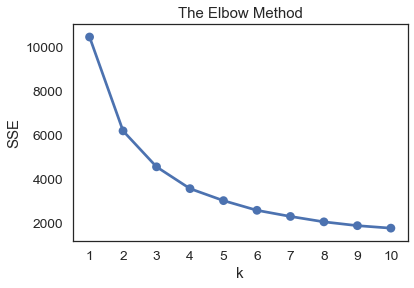

In [48]:
# Plot SSE for each *k*
plt.title('The Elbow Method')
plt.xlabel('k'); plt.ylabel('SSE')
sns.pointplot(x=list(sse.keys()), y=list(sse.values()))
plt.show()

The point at 4 clusters is where we identify the largest angle. However, it is important to understand that building segmentation only at that number of clusters is not a hard rule but it should be taken as a recommended number and we should test several segmentation approaches. In the scope of this project, I'll choose number of clusters as 4

In [49]:
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(user_normalized)
cluster_labels = kmeans.labels_
df_rfm_k4 = user_rfm.assign(Cluster = cluster_labels)

In [50]:
#Transform user_normalized as DataFrame and add a Cluster column
user_normalized = pd.DataFrame(user_normalized, index=user_rfm.index, columns=user_rfm.columns)
user_normalized['Cluster'] = df_rfm_k4['Cluster']
user_normalized['CustomerID'] = user['customer_id']
#Melt the data into a long format so RFM values and metric names are stored in 1 column each
user_melt = pd.melt(user_normalized.reset_index(), id_vars=['CustomerID','Cluster'],value_vars=['Recency','Frequency',
        'Monetary'], var_name='Attribute', value_name='Value')

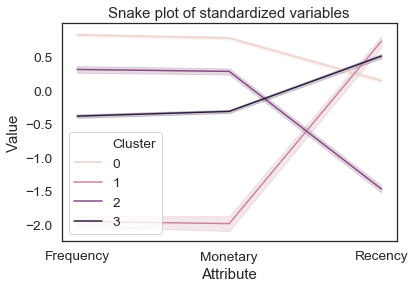

In [51]:
plt.title('Snake plot of standardized variables')
sns.lineplot(x="Attribute", y="Value", hue='Cluster', data=user_melt)

Now I will calculate the relative importance of the RFM values within each cluster using heatmap

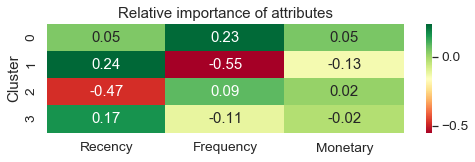

In [52]:
cluster_avg = df_rfm_k4.groupby(['Cluster']).mean()
population_avg = user_rfm.mean()
relative_imp = cluster_avg / population_avg - 1
plt.figure(figsize=(8, 2))
plt.title('Relative importance of attributes')
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap='RdYlGn')
plt.show()